In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "/media/veena/sp/DL_project/archive/Train/Train/Healthy"
train_files_powdery = "/media/veena/sp/DL_project/archive/Train/Train/Powdery"
train_files_rust = "/media/veena/sp/DL_project/archive/Train/Train/Rust"

test_files_healthy = "/media/veena/sp/DL_project/archive/Test/Test/Healthy"
test_files_powdery = "/media/veena/sp/DL_project/archive/Test/Test/Powdery"
test_files_rust = "/media/veena/sp/DL_project/archive/Test/Test/Rust"

valid_files_healthy = "/media/veena/sp/DL_project/archive/Validation/Validation/Healthy"
valid_files_powdery = "/media/veena/sp/DL_project/archive/Validation/Validation/Powdery"
valid_files_rust = "/media/veena/sp/DL_project/archive/Validation/Validation/Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

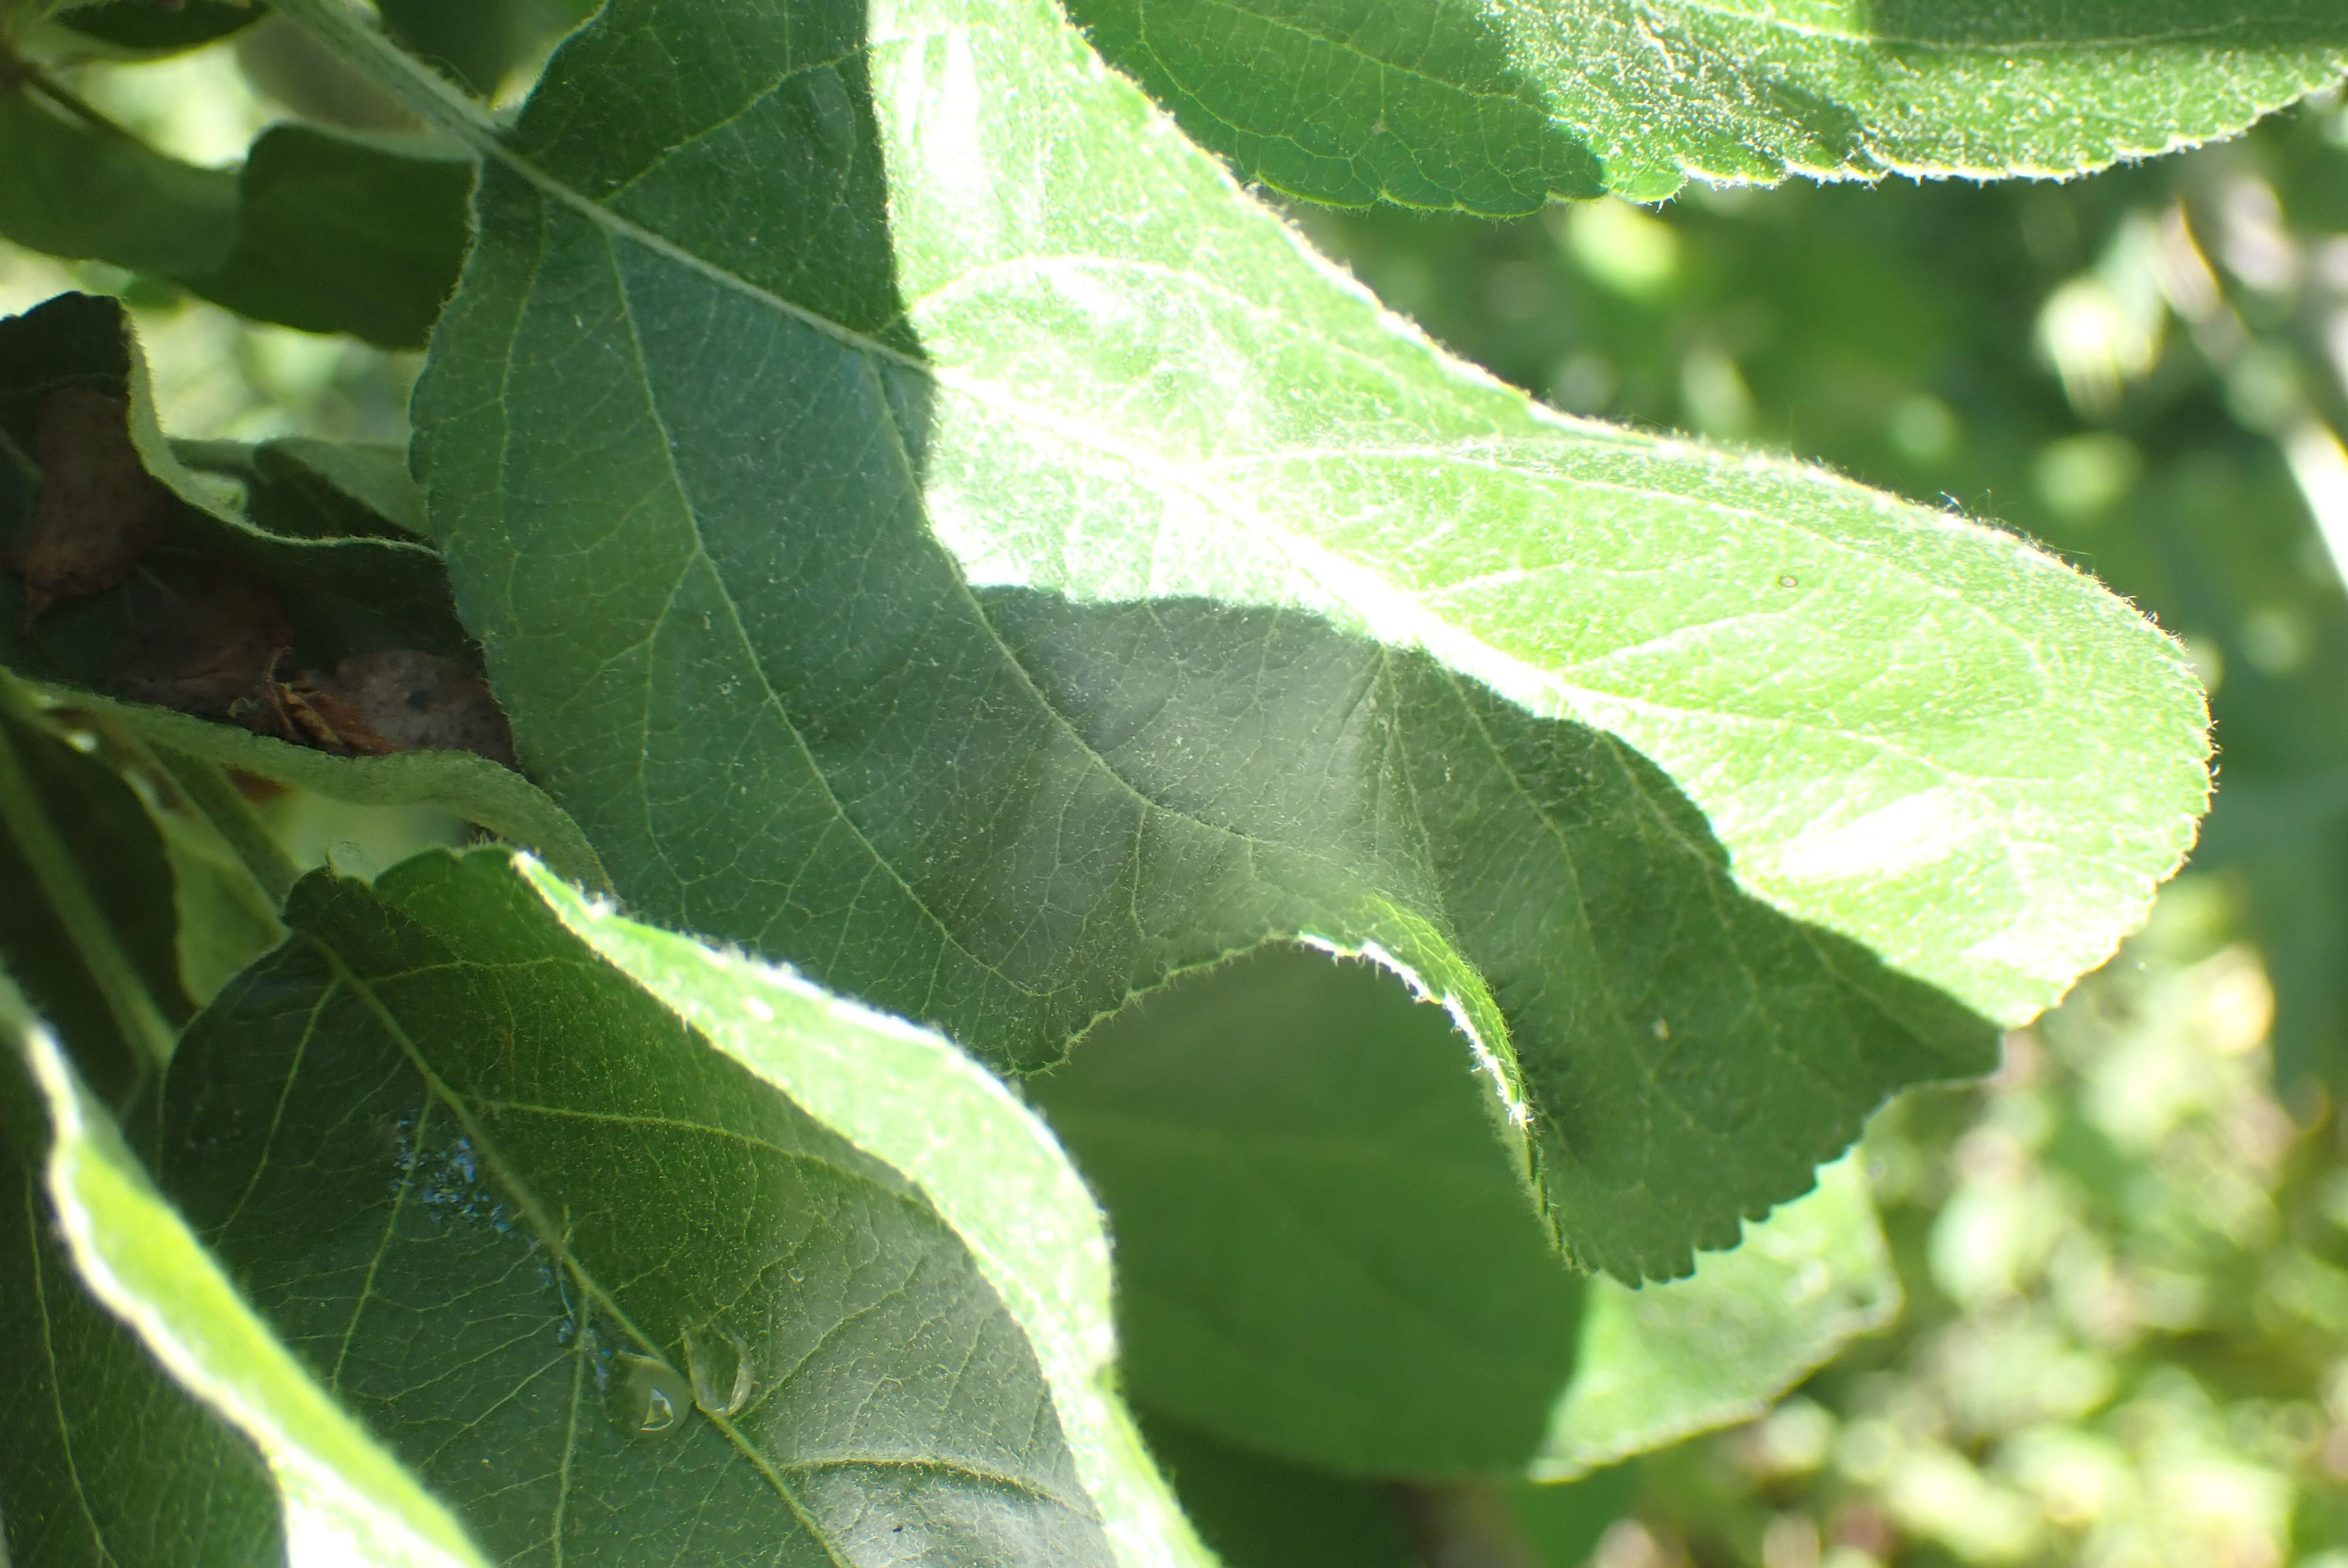

In [4]:
from PIL import Image
import IPython.display as display

image_path = '/media/veena/sp/DL_project/archive/Train/Train/Healthy/8c98ec6fb596c2d0.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

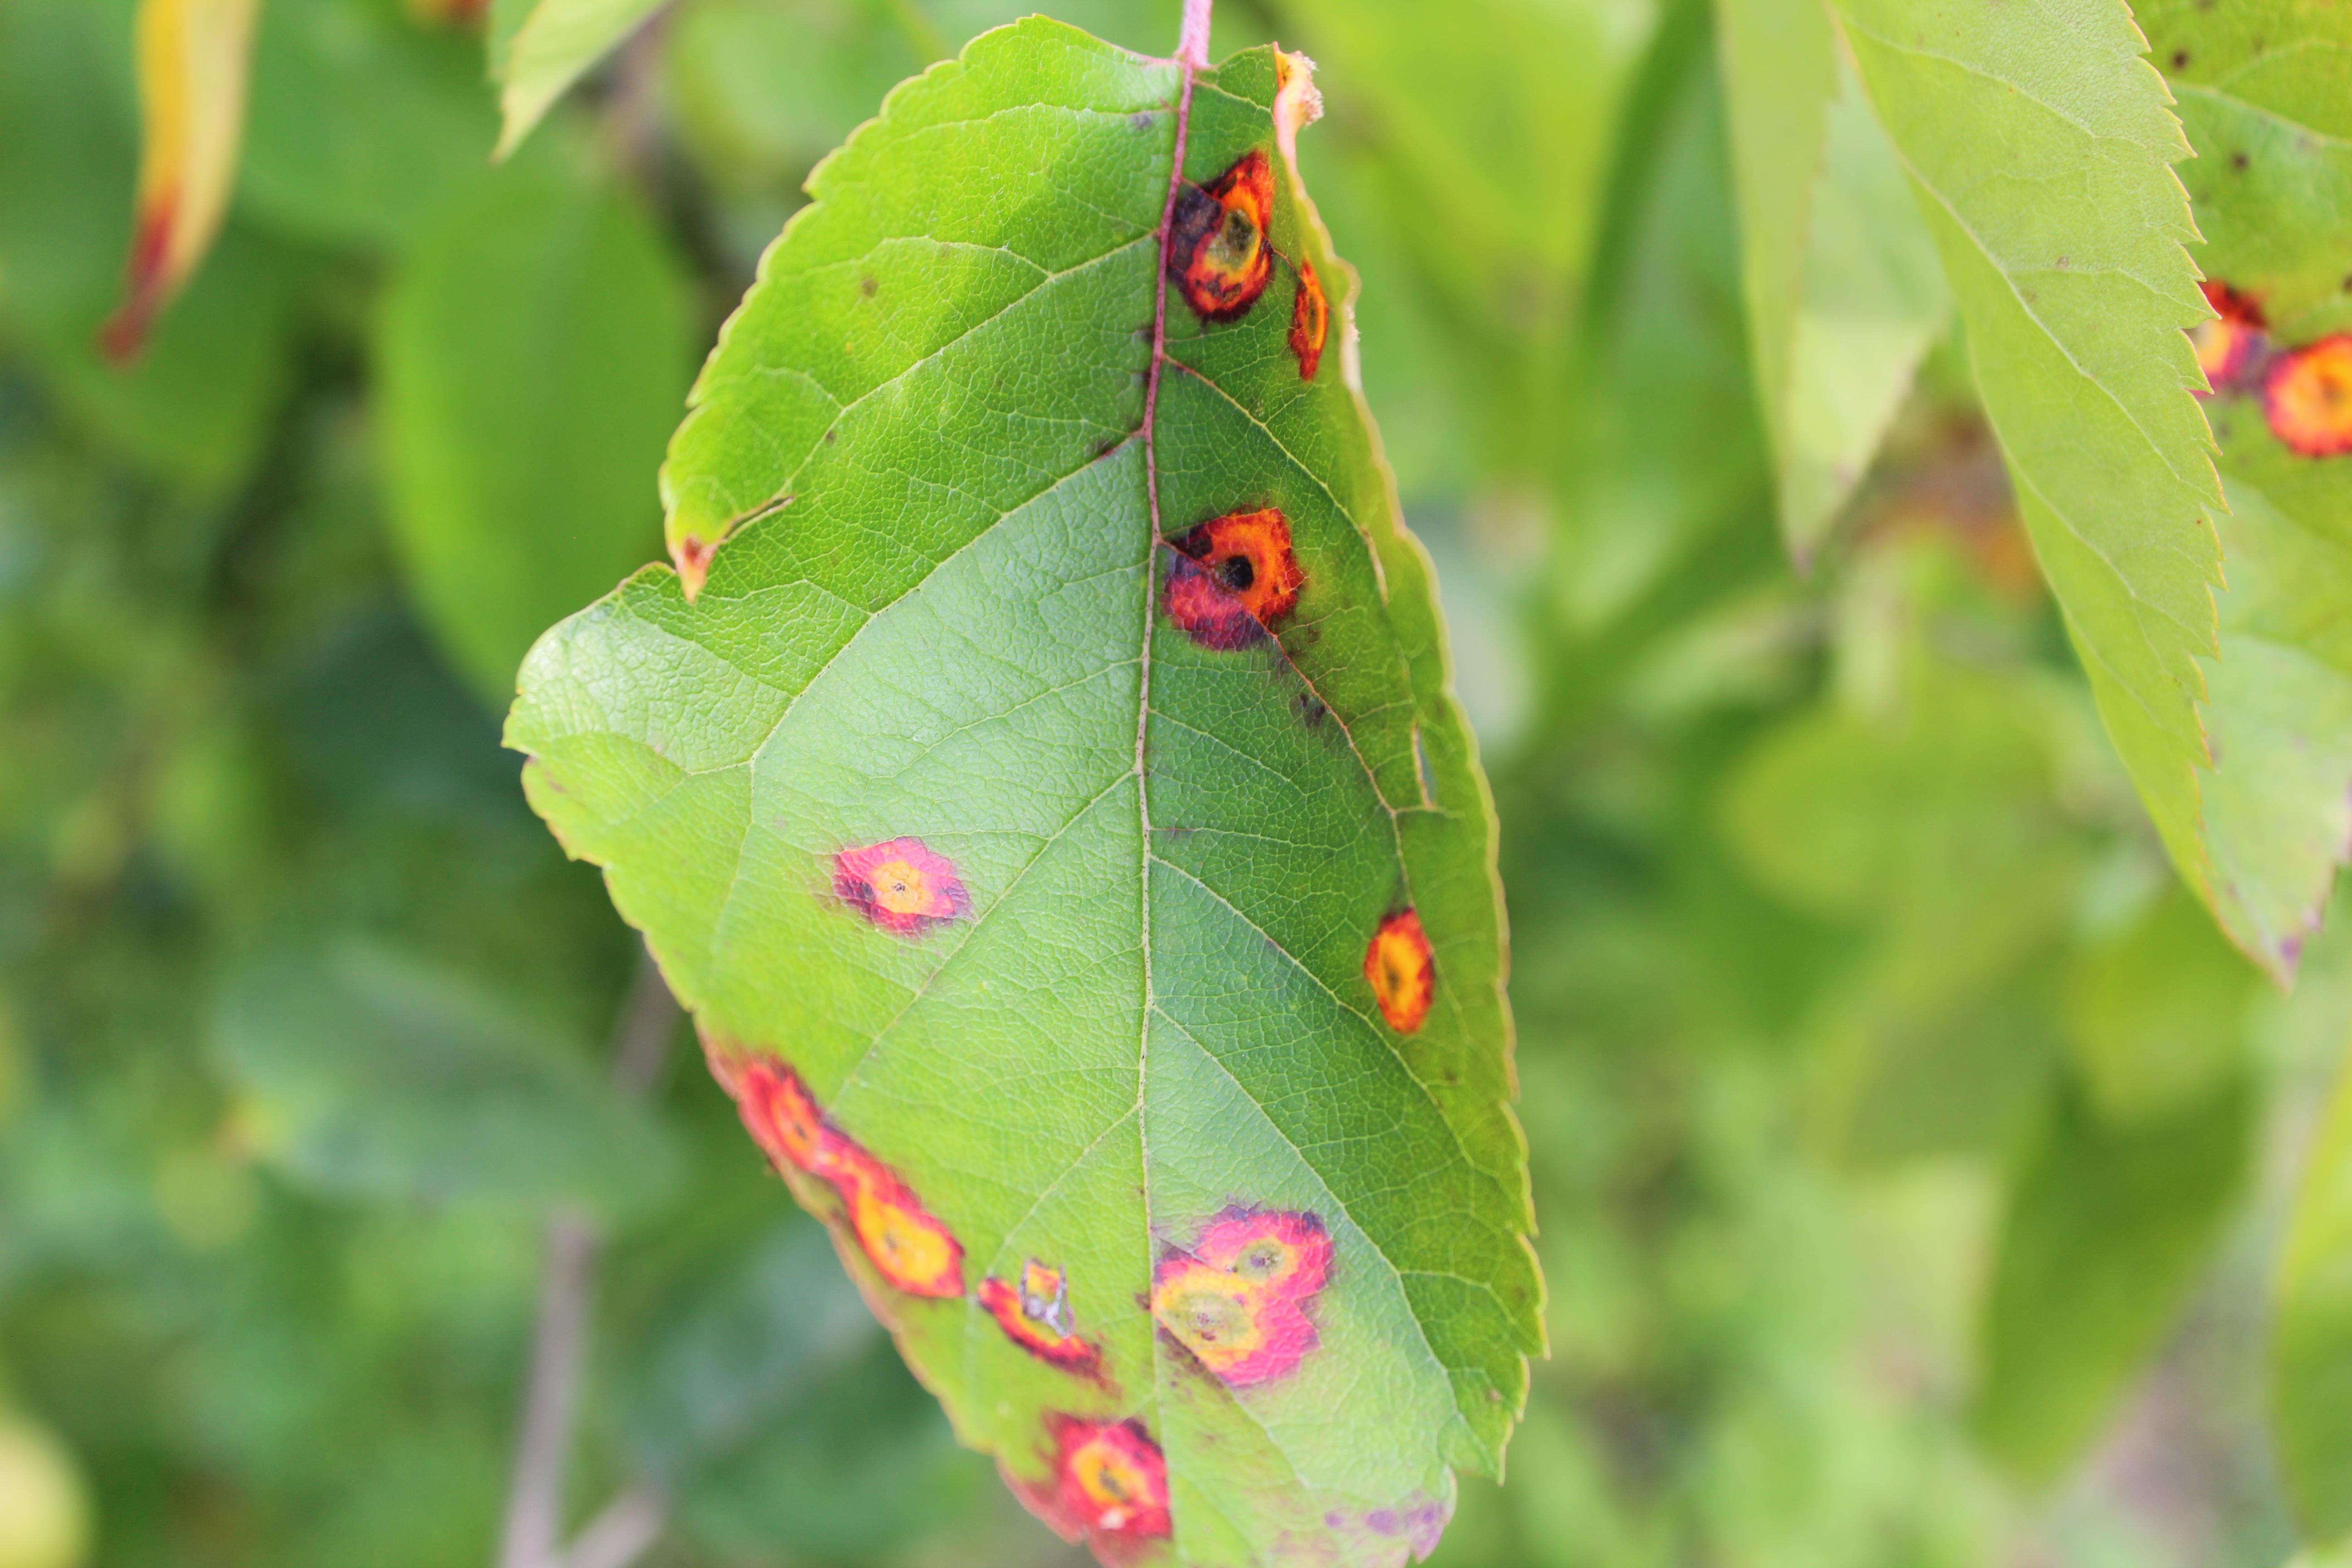

In [5]:
image_path = '/media/veena/sp/DL_project/archive/Train/Train/Rust/8ea7b9cc8bd2d809.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [6]:
import tensorflow as tf

# Replace:
# from keras.preprocessing.image import ImageDataGenerator

# With:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

2024-11-29 10:48:37.869593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-29 10:48:37.968014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-29 10:48:37.996492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 10:48:38.262369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-29 10:48:42.043653: W tensorflow/compiler/tf2

In [7]:
train_generator = train_datagen.flow_from_directory('/media/veena/sp/DL_project/archive/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/media/veena/sp/DL_project/archive/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

/home/veena/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-29 10:49:45.573074: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-11-29 10:49:45.743051: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47775744 exceeds 10% of free system memory.
2024-11-29 10:49:45.885950: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47775744 exceeds 10% of free system memory.
2024-11-29 10:49:45.935477: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47775744 exceeds 10% of free system memory.


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5


2024-11-29 10:50:03.170992: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47775744 exceeds 10% of free system memory.
/home/veena/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-11-29 10:50:13.183736: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19440000 exceeds 10% of free system memory.
2024-11-29 10:50:17.766998: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 3 of 8
2024-11-29 10:50:35.901010: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


42/42 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.3984 - loss: 3.0396 - val_accuracy: 0.5833 - val_loss: 1.0526
Epoch 2/5


2024-11-29 10:55:37.652102: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-11-29 10:55:46.430679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


42/42 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.7245 - loss: 0.5813 - val_accuracy: 0.8333 - val_loss: 0.4892
Epoch 3/5


2024-11-29 10:59:16.019344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-11-29 10:59:25.424099: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


42/42 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.8372 - loss: 0.4130 - val_accuracy: 0.8167 - val_loss: 0.7475
Epoch 4/5


2024-11-29 11:02:51.486531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-11-29 11:03:02.000844: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


42/42 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.8857 - loss: 0.2767 - val_accuracy: 0.7500 - val_loss: 0.4633
Epoch 5/5


2024-11-29 11:05:58.918967: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-11-29 11:06:05.633654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


42/42 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.9113 - loss: 0.2863 - val_accuracy: 0.8500 - val_loss: 0.4963


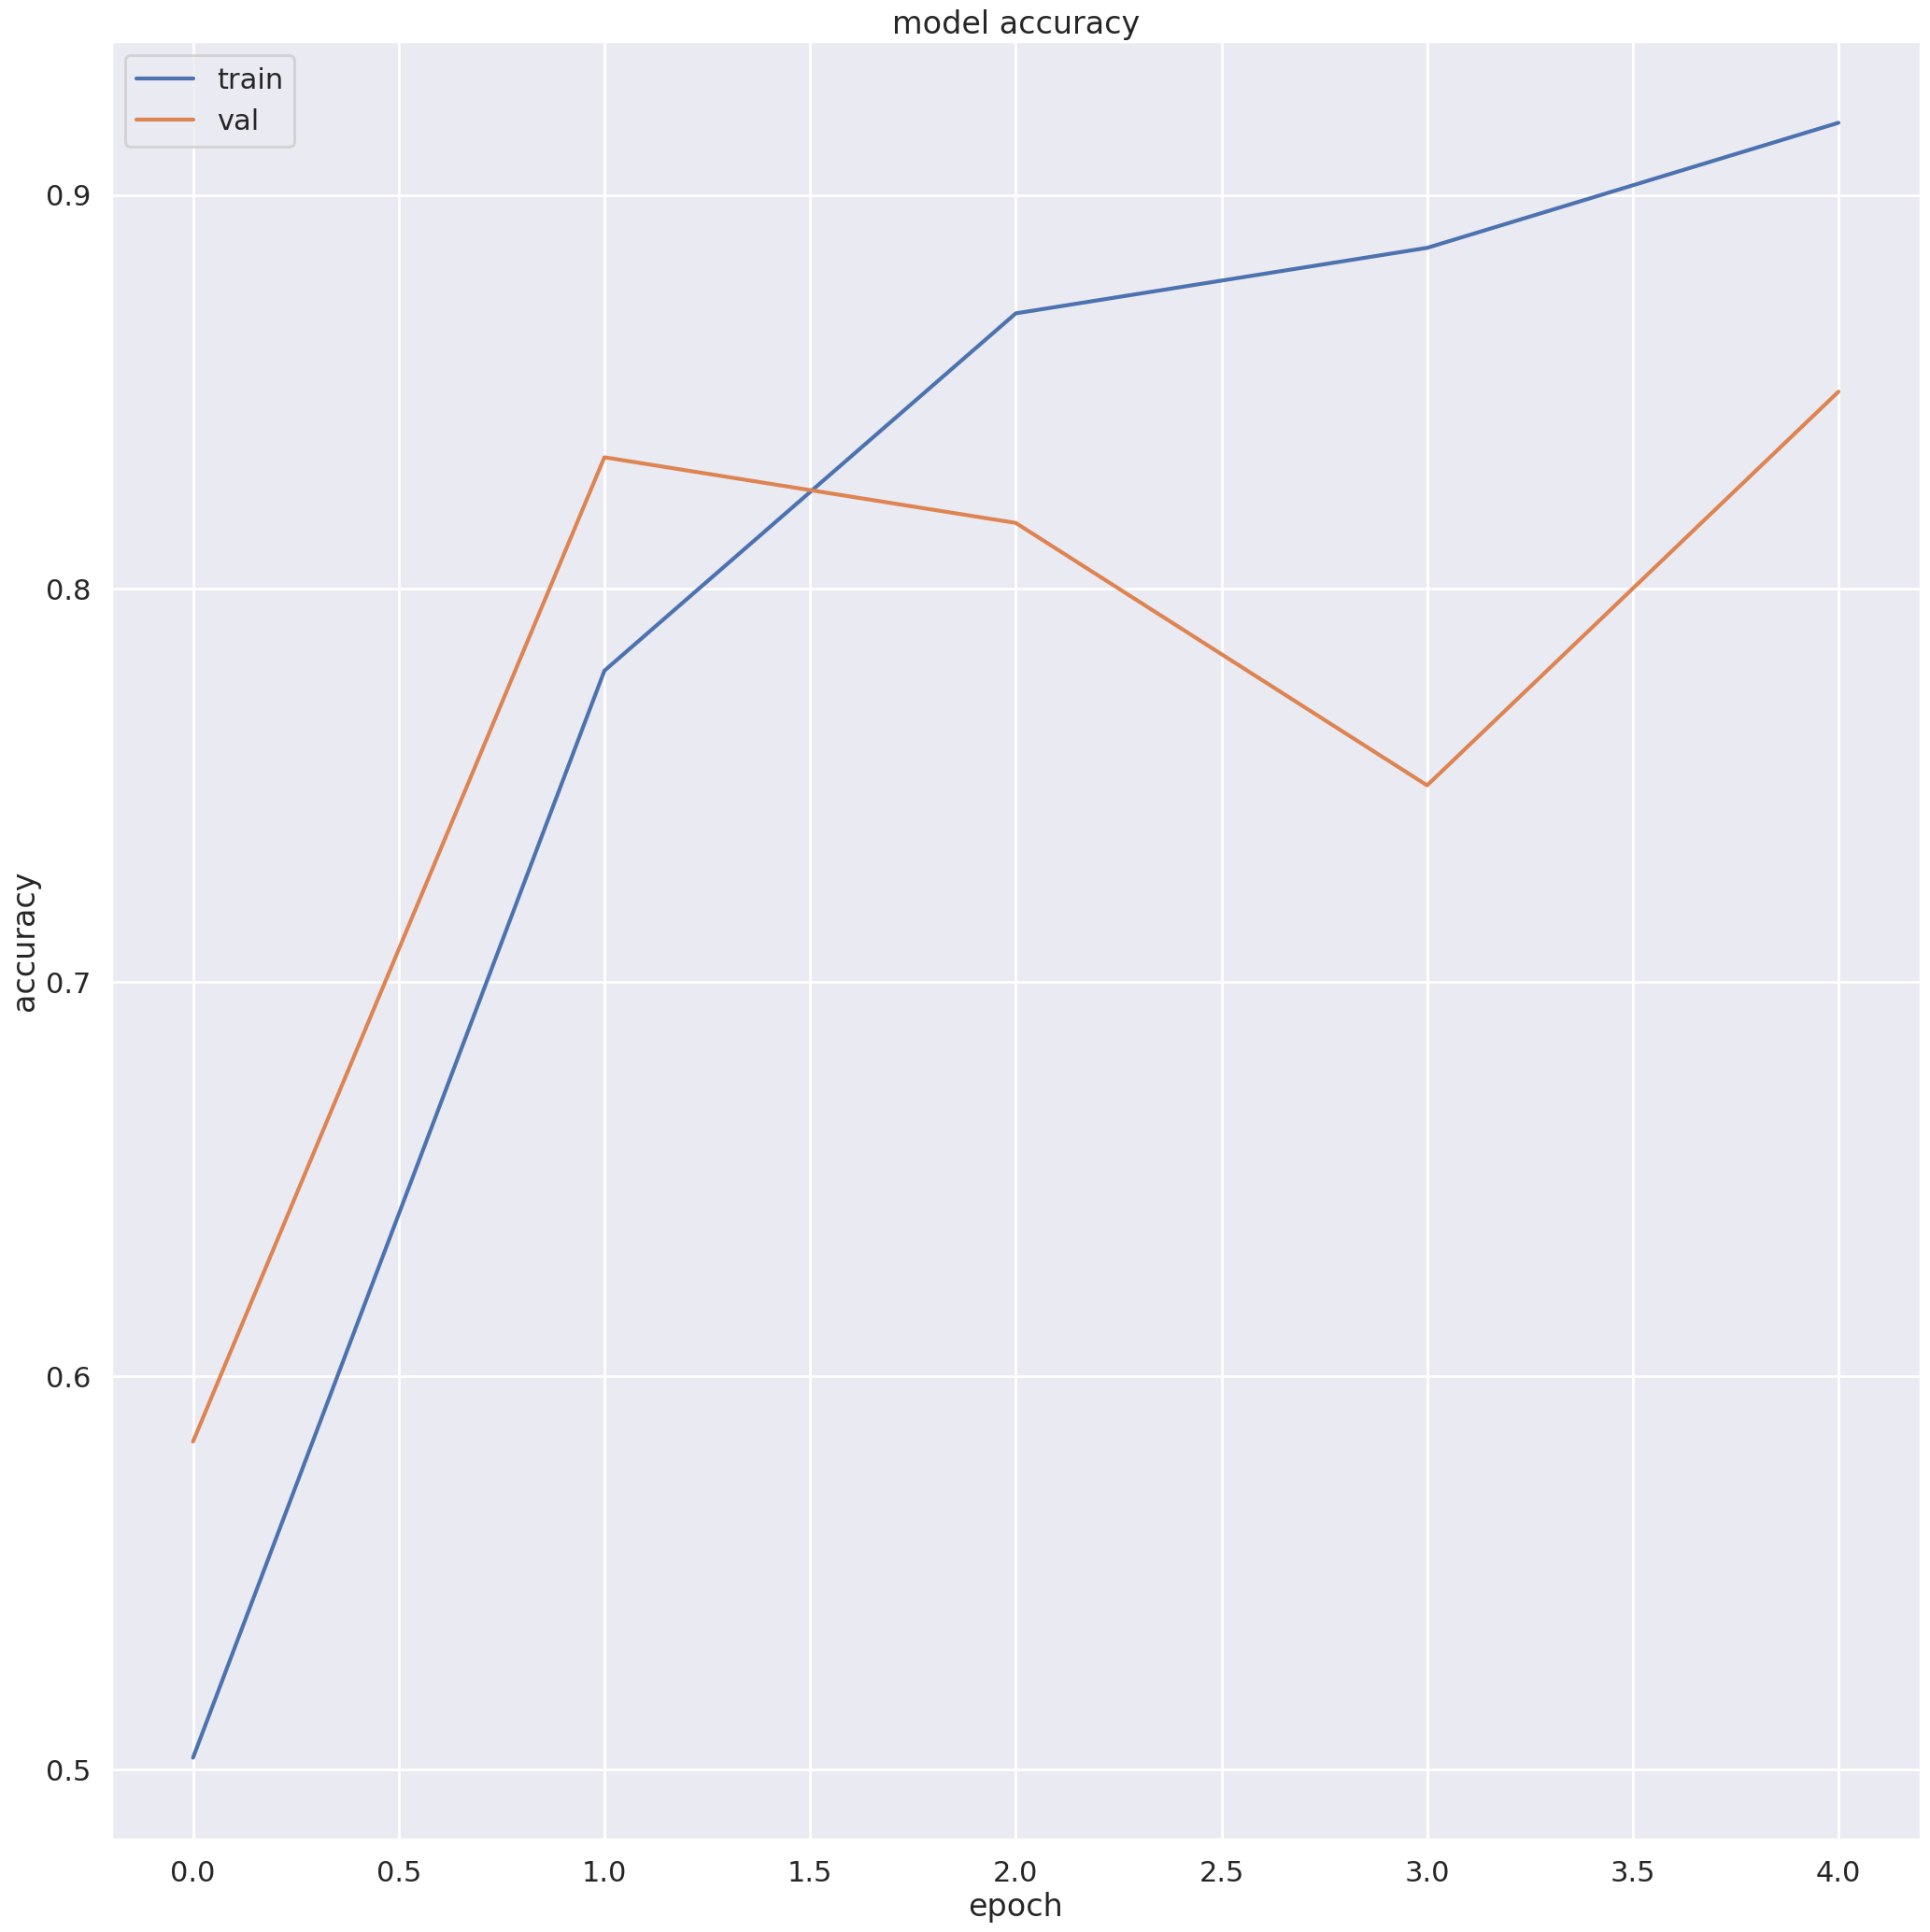

In [11]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
model.save("model.h5")

In [13]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/media/veena/sp/DL_project/archive/Test/Test/Rust/87e3d0c12a7ba995.jpg')

In [14]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


array([8.8455312e-02, 1.3758128e-07, 9.1154456e-01], dtype=float32)

In [15]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [16]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
